In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# Lendo o dataset
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    
    datasets = ['FaceShape Dataset/training_set', 'FaceShape Dataset/testing_set']
    output = []
    
   # Iterasi kumpulan data pelatihan dan pengujian
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterasi dengan setiap folder kategori
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]

                # Iterasi setiap gambar dalam folder
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":

                        # Get the path name of the image
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            # Leitura e redirecionamento da imagem
                            image = cv2.imread(img_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            # Append da image e do seu label correspondente
                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output


In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading FaceShape Dataset/training_set


 70%|███████   | 561/800 [00:08<00:06, 35.68it/s] 

Broken: FaceShape Dataset/training_set\Oblong\oblong (724).jpg


100%|██████████| 800/800 [00:12<00:00, 65.37it/s] 


Loading FaceShape Dataset/testing_set


100%|██████████| 200/200 [00:02<00:00, 69.04it/s] 


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (150, 150)


In [8]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(50, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(50, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(40, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(30, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(65, activation=tf.nn.softmax),
    tf.keras.layers.Dropout(0.2)

])

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100
25/25 [==============================] - 144s 5s/step - loss: 5.0524 - accuracy: 0.1797 - val_loss: 1.9118 - val_accuracy: 0.1937
Epoch 2/100
25/25 [==============================] - 130s 5s/step - loss: 4.4943 - accuracy: 0.2113 - val_loss: 1.8847 - val_accuracy: 0.2050
Epoch 3/100
25/25 [==============================] - 128s 5s/step - loss: 4.3967 - accuracy: 0.2026 - val_loss: 1.8492 - val_accuracy: 0.1850
Epoch 4/100
25/25 [==============================] - 143s 6s/step - loss: 4.6884 - accuracy: 0.1894 - val_loss: 1.7608 - val_accuracy: 0.2288
Epoch 5/100
25/25 [==============================] - 133s 5s/step - loss: 4.5214 - accuracy: 0.1997 - val_loss: 1.7499 - val_accuracy: 0.1937
Epoch 6/100
25/25 [==============================] - 130s 5s/step - loss: 4.2081 - accuracy: 0.2141 - val_loss: 1.7190 - val_accuracy: 0.2350
Epoch 7/100
25/25 [==============================] - 128s 5s/step - loss: 4.3564 - accuracy: 0.2113 - val_loss: 1.6511 - val_accuracy: 0.2350
Epoch 

In [3]:
model.save("faceshape_model.h5")

NameError: name 'model' is not defined

In [11]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

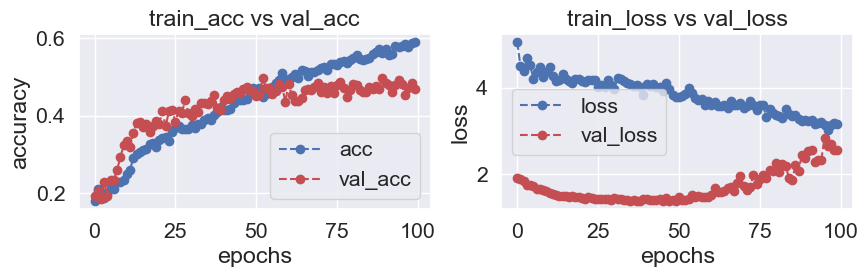

In [12]:
plot_accuracy_loss(history)

In [13]:
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 9s 273ms/step - loss: 2.9695 - accuracy: 0.4370


In [14]:
def display_random_image(class_names, images, labels):
    """
    #Exibição de uma imagem aleatória
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

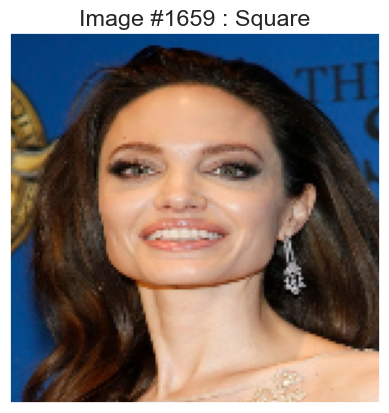

In [15]:
display_random_image(class_names, train_images, train_labels)

In [16]:
def display_examples(class_names, images, labels):
    """
    #Exibição de 25 imagens aleatórias e seus labels correspondentes
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

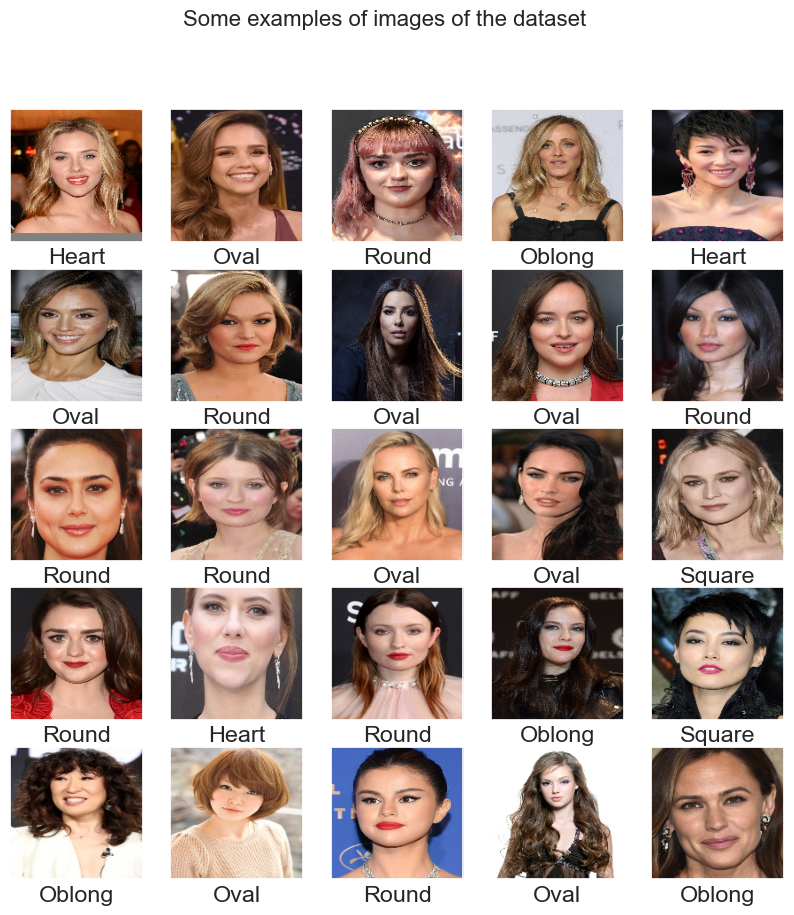

In [17]:
display_examples(class_names, train_images, train_labels)

32/32 [==============================] - 9s 281ms/step


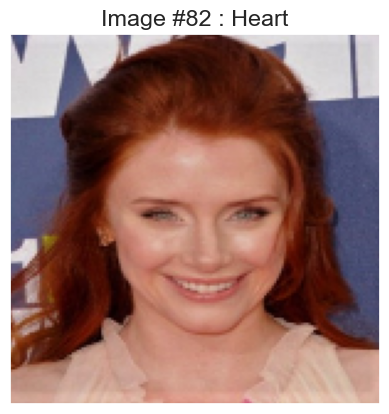

In [18]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [19]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

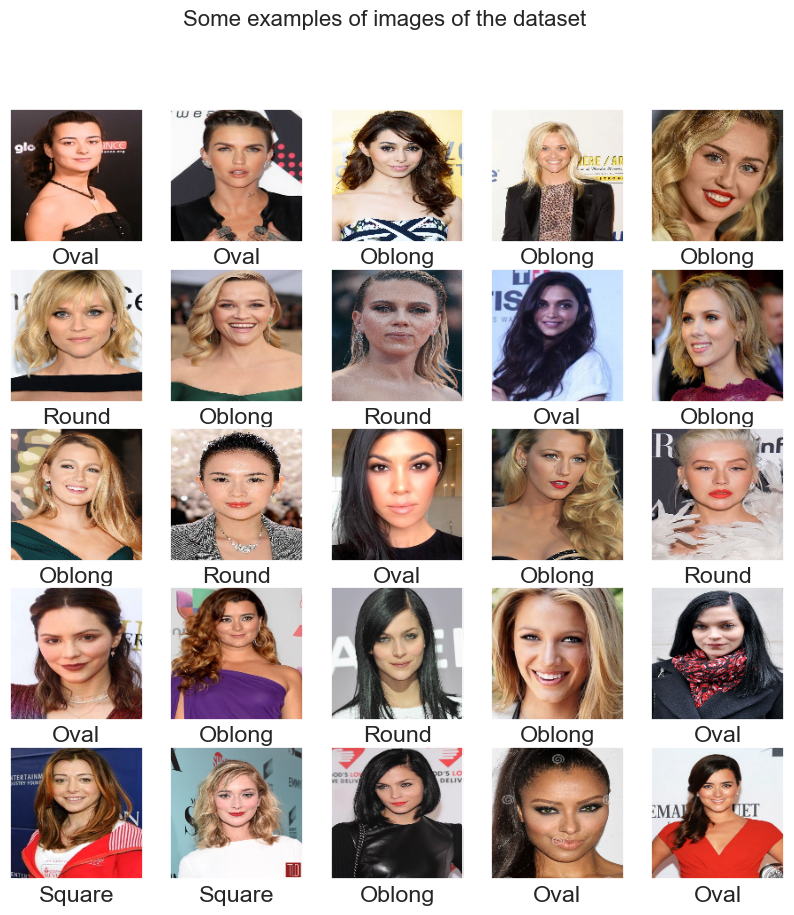

In [20]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

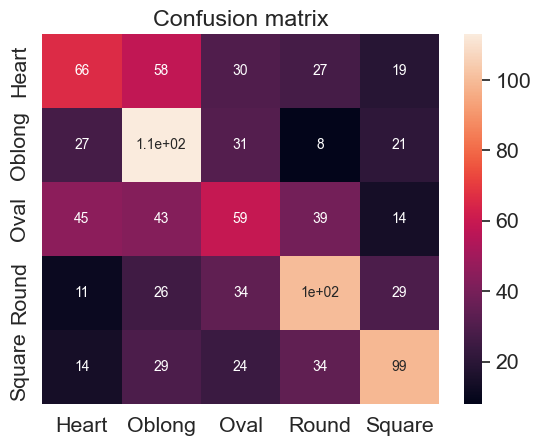

In [21]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [22]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels)
# Recall
from sklearn.metrics import recall_score
recall_score(test_labels, pred_labels, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(test_labels, pred_labels, average=None)

#f1-score
from sklearn.metrics import f1_score
f1_score(test_labels, pred_labels, average=None)

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_labels, pred_labels, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Heart       0.40      0.33      0.36       200
      Oblong       0.42      0.56      0.48       200
        Oval       0.33      0.29      0.31       200
       Round       0.48      0.50      0.49       200
      Square       0.54      0.49      0.52       200

    accuracy                           0.44      1000
   macro avg       0.44      0.44      0.43      1000
weighted avg       0.44      0.44      0.43      1000



In [2]:
model.save("faceshape.h5")

NameError: name 'model' is not defined

In [1]:

# # Fungsi untuk mengklasifikasikan bentuk wajah
# def classify_face_shape(image_path):
#     # Load model
#     model = tf.keras.models.load_model('model.h5')

#     # Load image
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, IMAGE_SIZE)

#     # Preprocess image
#     image = np.array(image, dtype='float32')
#     image = image / 255.0
#     image = np.expand_dims(image, axis=0)

#     # Predict face shape
#     prediction = model.predict(image)
#     class_index = np.argmax(prediction)
#     face_shape = class_names[class_index]

#     return face_shape

# # Fungsi untuk menampilkan foto dan hasil klasifikasi
# def display_face_shape(image_path):
#     # Load image
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Classify face shape
#     face_shape = classify_face_shape(image_path)

#     # Display image and face shape
#     plt.imshow(image)
#     plt.title('Face Shape: ' + face_shape)
#     plt.axis('off')
#     plt.show()

# # Masukkan path foto wajah yang ingin diklasifikasikan
# image_path = 'image.jpg'

# # Tampilkan foto dan hasil klasifikasi
# display_face_shape(image_path)